In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import lanelet2
from lanelet2.core import (AllWayStop, AttributeMap, BasicPoint2d,
                           BoundingBox2d, Lanelet, LaneletMap,
                           LaneletWithStopLine, LineString3d, Point2d, Point3d,
                           RightOfWay, TrafficLight, getId)
from lanelet2.projection import (UtmProjector, MercatorProjector,
                                 LocalCartesianProjector, GeocentricProjector)

from coordinates import *

In [7]:
path = 'lanelet_files/j6_out.osm'
    # Select a suitable projector depending on the data source
    ## UtmProjector: (0,0,0) is at the provided lat/lon on the WGS84 ellipsoid
# projector = lanelet2.io.Origin()
#     ## MarcatorProjector: (0,0,0) is at the provided lat/lon on the mercator cylinder
# projector = MercatorProjector(lanelet2.io.Origin(49, 8.4))
#     ## LocalCartesianProjector: (0,0,0) is at the provided origin (including elevation)
projector = LocalCartesianProjector(lanelet2.io.Origin(47.543,21.64,165.4))

# gc_projector = GeocentricProjector(lanelet2.io.Origin())
    # Loading the map from a file
loadedMap = lanelet2.io.load(path,projector)

In [8]:
z = Map()

In [9]:
id = 10000
for elem in loadedMap.laneletLayer:
    linestr = LineString3d(id)
    id += 1
    for l, r in zip(elem.leftBound, elem.rightBound):
        pp = PairPoint(Point(l.id, l.x, l.y, l.z, 0), Point(r.id,r.x, r.y, r.z, 1), idx=id)
        z._addLaneLet(pp)
        point = pp.get_mid_point()
        linestr.append(Point3d(point.id, point.x, point.y, point.z))
        id += 1
    loadedMap.add(linestr)
        

In [10]:
lanelet2.io.write('june5_001.osm', loadedMap, projector)

8782


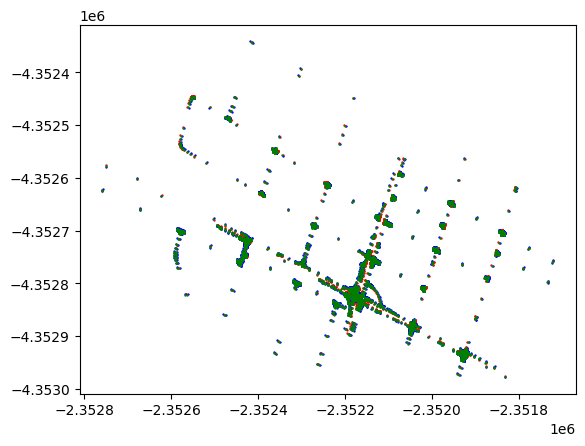

In [27]:
def sct_plot(num_elem = 10000):
    print(z.map[0].left.id)
    _x_coord_lft = [p.left.x for p in z.map[: num_elem]]
    _y_coord_lft = [p.left.y for p in z.map[: num_elem]]
    plt.scatter(_x_coord_lft,_y_coord_lft, color =  'red', s=0.5)

    _x_coord_rgt = [p.right.x for p in z.map[: num_elem]]
    _y_coord_rgt = [p.right.y for p in z.map[: num_elem]]
    plt.scatter(_x_coord_rgt, _y_coord_rgt, color = 'blue', s=0.5)

    _x_coord_mid = [p.get_mid_point().x for p in z.map[: num_elem]]
    _y_coord_mid = [p.get_mid_point().y for p in z.map[: num_elem]]

    plt.scatter(_x_coord_mid, _y_coord_mid, color = 'green', s=0.5)

sct_plot()


mapillary Device ID is not set
drawing lanelet 0 of 680
drawing lanelet 100 of 680
drawing lanelet 200 of 680
drawing lanelet 300 of 680
drawing lanelet 400 of 680
drawing lanelet 500 of 680
drawing lanelet 600 of 680


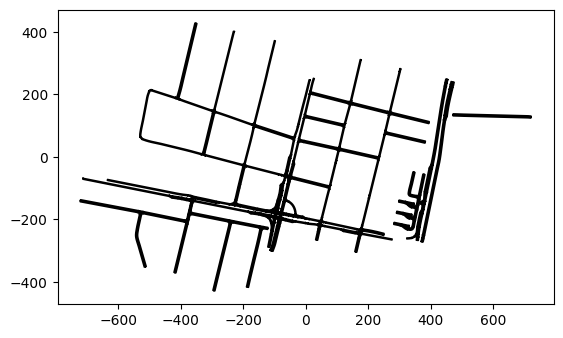

In [17]:
import crdesigner.map_conversion.osm2cr.converter_modules.converter as converter

# open the map and convert it to a scenario
scenario = converter.GraphScenario("files/j6.osm")

# draw and show the scenario
scenario.plot()